<a href="https://colab.research.google.com/github/jordipozo/TFM_MasterIA/blob/main/gestureDetectorfinal_last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DETECCIÓN DE GESTOS - GESTURE DETECTION

In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
BASE_FOLDER = '/content/drive/MyDrive/TFM_DATA/'

## PROCESO DE OBTENCIÓN DE DATOS EN BRUTO (RAW DATA) 

### GESTIÓN DE LA SEÑAL Y TRANSFORMACIÓN PARA OBTENCIÓN DATOS DE PARTIDA

In [123]:
import json
import pandas as pd
import numpy as np
import pathlib
from pathlib import Path
from sklearn.preprocessing import OneHotEncoder

np.random.seed(42)

import warnings
warnings.filterwarnings("ignore") # ignore warnings

In [ ]:

df_sensor_full=pd.DataFrame(columns=['label','codeId','sensorvalues','dimensions','lenrawdata']) #create a dataframe to store the full dataset values

In [ ]:
# Función para asignar un código numérico a cada etiqueta
def labelAssign(textLabel):
    if textLabel == 'aspa':
        return 1
    elif textLabel == 'barrido':
        return 2
    elif textLabel == 'circulo':
        return 3
    elif textLabel == 'desconocido':
        return 4

In [ ]:
def generateDataset(pathlist,df_sensor):
    for path in pathlist:
        path_in_str = str(path)
        label = (path.name)
        label= label[0:label.find('.')] #get the label from the file name
        codeId = labelAssign(label)  #assign a number to the label
        with open(path_in_str) as json_file:
            data = json.load(json_file)
            sensorvalues = []
            for value in data['payload']['values']:
                sensorvalues.append(value)
            sensorvalues = np.array(sensorvalues)
            dimensions = sensorvalues.shape
            lenrawdata = len(sensorvalues)
            df_sensor.loc[len(df_sensor)] = [label, codeId, sensorvalues, dimensions, lenrawdata]
    return df_sensor

Detección y ajuste de muestras con longitud diferente al resto

In [ ]:
# Función para conocer la cantidad de muestras 'irregulares' (tienen distinta longitud)  
def locateDifferentSampleLenght(df_sensor):
    i=0
    counter=0
    for values in df_sensor['dimensions']:
        if (values) != (130,3):
            counter=counter+1
        i+=1
    print("Muestras de distinto tamaño: ", counter)

In [ ]:
# Función para ajustar el tamaño de las muestras 'irregulares'
def adjustSampleLenght(df_sensor):
    i=0
    muestrasModificadas=0
    for values in df_sensor['dimensions']:
        if (values) != (130,3):
            if (values[0]) > 130:
                df_sensor['sensorvalues'][i] = df_sensor['sensorvalues'][i][0:130]
                df_sensor['dimensions'][i] = (130,3)
                df_sensor['lenrawdata'][i] = 130
                muestrasModificadas+=1
            if (values[0]) < 130:
                df_sensor['sensorvalues'][i] = np.concatenate((df_sensor['sensorvalues'][i],np.zeros((130-values[0],3))))
                df_sensor['dimensions'][i] = (130,3)
                df_sensor['lenrawdata'][i] = 130    
                muestrasModificadas+=1
        i+=1

    print ('Número de muestras modificadas: ', muestrasModificadas)

### Cargamos la información en bruto en formato json de los conjuntos de test y train

In [ ]:

pathlist = Path('../python/dataset_final/completo/').glob('**/*.json')
df_sensor_full = generateDataset(pathlist, df_sensor_full)

Generación del dataframe con el dataset COMPLETO

In [ ]:
# Tipos de datos del dataset cargado
df_sensor_full.dtypes

label           object
codeId          object
sensorvalues    object
dimensions      object
lenrawdata      object
dtype: object

In [ ]:
# Distribución de datos
df_sensor_full.describe()

,label,codeId,sensorvalues,dimensions,lenrawdata
count,1085,1085,1085,1085,1085
unique,4,4,1085,3,3
top,desconocido,4,"[[1.85, 9.26, 0.98], [2.26, 9.24, 1.07], [2.66...","(130, 3)",130
freq,279,279,1,1009,1009


In [ ]:
df_sensor_full.shape

(1085, 5)

In [ ]:
df_sensor_full.head()

,label,codeId,sensorvalues,dimensions,lenrawdata
0,circulo,3,"[[0.08, 9.59, -1.47], [0.05, 9.64, -1.49], [0....","(130, 3)",130
1,aspa,1,"[[1.08, 8.3, 3.37], [0.85, 8.11, 3.63], [0.89,...","(130, 3)",130
2,desconocido,4,"[[-0.21, 0.04, 8.3], [-0.23, 0.06, 8.36], [-0....","(130, 3)",130
3,desconocido,4,"[[-0.09, 0.07, 8.42], [-0.09, -0.01, 8.3], [0....","(130, 3)",130
4,barrido,2,"[[-0.02, 9.72, -1.33], [-0.09, 9.73, -1.4], [0...","(130, 3)",130


In [ ]:
locateDifferentSampleLenght(df_sensor_full)

Muestras de distinto tamaño:  76


In [ ]:
grouped = df_sensor_full.groupby('dimensions')
grouped.size()

dimensions
(125, 3)      45
(130, 3)    1009
(131, 3)      31
dtype: int64

In [ ]:
adjustSampleLenght(df_sensor_full)

Número de muestras modificadas:  76


In [ ]:
df_sensor_full.head()

,label,codeId,sensorvalues,dimensions,lenrawdata
0,circulo,3,"[[0.08, 9.59, -1.47], [0.05, 9.64, -1.49], [0....","(130, 3)",130
1,aspa,1,"[[1.08, 8.3, 3.37], [0.85, 8.11, 3.63], [0.89,...","(130, 3)",130
2,desconocido,4,"[[-0.21, 0.04, 8.3], [-0.23, 0.06, 8.36], [-0....","(130, 3)",130
3,desconocido,4,"[[-0.09, 0.07, 8.42], [-0.09, -0.01, 8.3], [0....","(130, 3)",130
4,barrido,2,"[[-0.02, 9.72, -1.33], [-0.09, 9.73, -1.4], [0...","(130, 3)",130


### VISUALIZACIÓN DE LAS CARACTERÍSTICAS SEÑAL ORIGINAL
1.- Tomamos los valores por separado de la señal del acelerómetro (x, y, z) de una muestra del conjunto de test.  
2.- Ploteamos la señal original

In [ ]:

pulso=df_sensor_full['sensorvalues'][1]
x_data=pulso[:,0]
y_data=pulso[:,1]
z_data=pulso[:,2]


In [ ]:
def get_values(y_values, N, f_s):
    f_values = np.linspace(0.0, N/f_s, N)
    return f_values, y_values

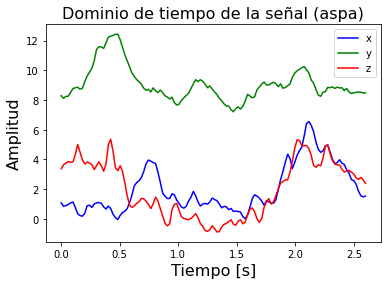

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
intervalo=0.052
x_values, x_signal_values = get_values(x_data, 130, 50)
y_values, y_signal_values = get_values(y_data, 130, 50)
z_values, z_signal_values = get_values(z_data, 130, 50)

plt.plot(x_values, x_signal_values, color='blue')
plt.plot(y_values, y_signal_values, color='green')
plt.plot(z_values, z_signal_values, color='red')
plt.legend(['x', 'y', 'z'])
plt.xlabel('Tiempo [s]', fontsize=16)
plt.ylabel('Amplitud', fontsize=16)
plt.title("Dominio de tiempo de la señal ("+ df_sensor_full['label'][1]+")", fontsize=16)
plt.show()

### APLICACIÓN DE LA TRANSFORMADA RÁPIDA DE FOURIER SOBRE LA SEÑAL ORIGINAL  
1.- Tomamos la matriz original  
2.- Operamos con la Transformada Rápida de Fourier - Librería scipy

La FFT de una señal de entrada de N puntos, devolverá un vector de N puntos.  
La primera mitad de este vector (N/2 puntos) contiene los valores útiles del espectro de frecuencias desde 0 Hz hasta la frecuencia de Nyquist de f_s / 2.  
La segunda mitad contiene el conjugado complejo y puede descartarse ya que no proporciona ningún información útil.

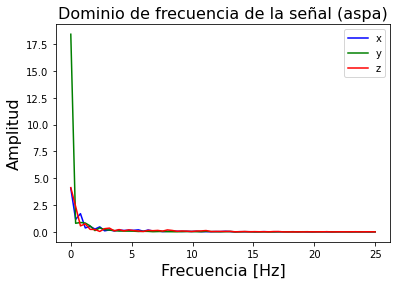

In [ ]:
from scipy.fftpack import fft   


def get_fft_values(y_values, N, f_s):
    f_values = np.linspace(0.0, f_s/2.0, N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values



x_values, x_fft_values=get_fft_values(x_data, 128, 50)
y_values, y_fft_values=get_fft_values(y_data, 128, 50)
z_values, z_fft_values=get_fft_values(z_data, 128, 50)

plt.plot(x_values, x_fft_values, linestyle='-', color='blue')
plt.plot(y_values, y_fft_values, linestyle='-', color='green')
plt.plot(z_values, z_fft_values, linestyle='-', color='red')
plt.xlabel('Frecuencia [Hz]', fontsize=16)
plt.ylabel('Amplitud', fontsize=16)
plt.title("Dominio de frecuencia de la señal ("+ df_sensor_full['label'][1]+")", fontsize=16)
plt.legend(['x', 'y', 'z'])
plt.show()


### Ajuste del dataset COMPLETO

Generación de la partición X, y

In [ ]:
X=df_sensor_full['sensorvalues'] # carga los valores de las muestras para todo el dataset
y=df_sensor_full['label'] # carga las etiquetas de las muestras para todo el dataset

Conversión a numpy array

In [ ]:
X= X.to_list() # convierte los valores de las muestras a una lista
X= np.array(X) # convierte la lista a un array de numpy
y= np.array(y) # convierte las etiquetas a un array de numpy

ONE-HOT ENCODING para normalizar el conjunto de las etiquetas (y)

In [ ]:
onehot_encoder = OneHotEncoder(sparse=False)
y = y.reshape(len(y), 1)
onehot_encoded = onehot_encoder.fit_transform(y)
y=onehot_encoded

Cargar en original_signals y original_labels

In [ ]:
original_signals = X
original_labels = y

¿Qué características podemos obtener de estas transformaciones?   
Un primer paso es el tomar el valor de las frecuencias a las que se producen las oscilaciones y las amplitudes correspondientes.  
Es decir, la posición x e y de los picos en el espectro de frecuencia.  
Utilizamos a tal efecto una función desarrollada por Marcos Duarte que nos permite la detección de estos picos de forma muy sencilla.  
Con esta función de búsqueda de picos, podemos calcular la FFT de cada señal y usar las coordenadas x e y de los picos como entrada para nuestro clasificador.

In [ ]:
from detecta import detect_peaks #importa la libreria detecta para detectar picos

In [ ]:
def get_first_n_peaks(x, y, no_peaks=5):
    x_, y_ = list(x), list(y)
    if len(x_) >= no_peaks:
        return x_[:no_peaks], y_[:no_peaks]
    else:
        missing_no_peaks = no_peaks-len(x_)
        return x_ + [0]*missing_no_peaks, y_ + [0]*missing_no_peaks


def get_features(x_values, y_values, mph):
    indices_peaks = detect_peaks(y_values, mph=mph)
    peaks_x, peaks_y = get_first_n_peaks(
        x_values[indices_peaks], y_values[indices_peaks])
    return peaks_x + peaks_y


In [ ]:

def extract_features_labels(dataset, labels, N, f_s, denominator):
    percentile = 5
    list_of_features = []
    list_of_labels = []
    for signal_no in range(0, len(dataset)):
        features = []
        list_of_labels.append(labels[signal_no])
        for signal_comp in range(0, dataset.shape[2]):
            signal = dataset[signal_no, :, signal_comp]
            signal_min = np.nanpercentile(signal, percentile)
            signal_max = np.nanpercentile(signal, 100-percentile)
            #set minimum peak height
            mph = signal_min + (signal_max - signal_min)/denominator
            features += get_features(*get_fft_values(signal, N, f_s), mph)
        list_of_features.append(features)
    return np.array(list_of_features), np.array(list_of_labels)

En este punto debemos cargar tanto datos como etiquetas en ambos conjuntos: train y test.  
Para ello, tomaremos la etiqueta de la columna 'label' y los datos del acelerómetro que están en la columna 'sensorvalues'

In [ ]:
N = 128
f_s = 50
t_n = 2.56
T = t_n / N

denominator = 10

In [ ]:
X,Y= extract_features_labels(original_signals, original_labels, N, f_s, denominator)

## PREPROCESADO Y LIMPIEZA (EDA)

- CARGA DATOS EN PANDAS DATAFRAME  
- COMPROBACIÓN BALANCEADO DE INFORMACIÓN  
- MATRIZ DE CORRELACIÓN  
- COMPROBACIÓN NO NULOS  
- PCA - REDUCCIÓN DE DIMENSIONES

In [ ]:
print("Estructura conjunto total de datos")
print("Datos:"'\n',X) 
print("Shape: ", X.shape)
print("Tipo: ",X.dtype)  


Estructura conjunto total de datos
Datos:
 [[1.98412698 3.57142857 5.15873016 ... 0.08201532 0.12718868 0.04186698]
 [0.79365079 0.         0.         ... 0.22086287 0.19178255 0.14424554]
 [0.79365079 1.58730159 3.57142857 ... 0.         0.         0.        ]
 ...
 [0.79365079 1.58730159 2.38095238 ... 0.15370964 0.1325362  0.19611221]
 [1.19047619 2.38095238 3.57142857 ... 1.25658472 0.75978453 1.15070537]
 [0.79365079 1.58730159 3.57142857 ... 0.83365188 0.67046606 0.42230274]]
Shape:  (1085, 30)
Tipo:  float64


CARGAMOS LOS DATOS A UN DATAFRAME PARA EL PREPROCESADO Y LIMPIEZA

In [ ]:
ds_full=pd.DataFrame(X,columns=['X1','Y1','Z1','X2','Y2','Z2','X3','Y3','Z3','X4','Y4','Z4','X5','Y5','Z5','X6','Y6','Z6','X7','Y7','Z7','X8','Y8','Z8',
                                'X9','Y9','Z9','X10','Y10','Z10'
                                ])

In [ ]:
# Añadimos las etiquetas.
import tensorflow as tf

ds_full['label']=tf.argmax(Y,axis=1)


In [93]:
path= BASE_FOLDER + 'dataframe_sensor_full.csv'

In [ ]:
# guardar datos sensor
ds_full.to_csv(path)

In [124]:
# cargar datos sensor
ds_full=pd.read_csv(path)
ds_full=ds_full.drop(ds_full.columns[[0]], axis='columns')

COMPROBACION BALANCE DATOS DATASET

In [125]:
print(ds_full.shape)
print(ds_full.groupby('label').size())


(1085, 31)
label
0    257
1    271
2    278
3    279
dtype: int64


Búsqueda de posibles valores nulos

In [126]:
null_columns=ds_full.columns[ds_full.isnull().any()]
ds_full[null_columns].isnull().sum()
print(ds_full[ds_full.isnull().any(axis=1)][null_columns].head())

Empty DataFrame
Columns: []
Index: []


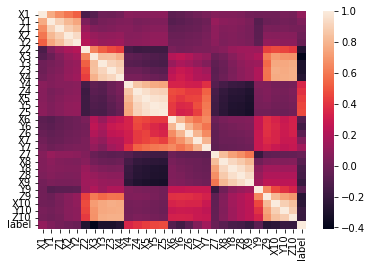

In [127]:
# MATRIZ DE CORRELACIÓN DEL DATASET ORIGINAL
import seaborn as sns
import matplotlib.pyplot as plt
corr = ds_full.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()


In [128]:

#print(corr,'\n')
corr=round(corr,3)
corr.style.background_gradient()

,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10,label
X1,1.000000,0.764000,0.668000,0.598000,0.528000,-0.131000,-0.089000,-0.011000,-0.015000,0.006000,0.081000,0.070000,0.071000,0.081000,0.083000,-0.067000,-0.057000,-0.032000,-0.003000,0.022000,0.061000,0.049000,0.051000,0.041000,0.007000,-0.002000,-0.000000,-0.000000,0.023000,0.012000,0.105000
Y1,0.764000,1.000000,0.900000,0.811000,0.749000,0.041000,-0.025000,0.018000,0.029000,0.045000,0.051000,0.027000,0.038000,0.048000,0.048000,-0.091000,-0.076000,-0.054000,-0.037000,-0.013000,0.122000,0.082000,0.075000,0.062000,0.034000,-0.088000,-0.021000,-0.007000,0.007000,-0.003000,0.048000
Z1,0.668000,0.900000,1.000000,0.885000,0.832000,0.125000,0.057000,0.040000,0.052000,0.069000,0.069000,0.048000,0.060000,0.073000,0.071000,-0.051000,-0.048000,-0.033000,-0.023000,0.008000,0.095000,0.057000,0.061000,0.048000,0.026000,-0.077000,0.032000,0.024000,0.031000,0.017000,0.015000
X2,0.598000,0.811000,0.885000,1.000000,0.938000,0.186000,0.125000,0.102000,0.108000,0.115000,0.070000,0.072000,0.088000,0.103000,0.100000,-0.027000,-0.024000,-0.012000,-0.004000,0.026000,0.094000,0.044000,0.055000,0.042000,0.026000,-0.070000,0.074000,0.069000,0.073000,0.066000,-0.009000
Y2,0.528000,0.749000,0.832000,0.938000,1.000000,0.220000,0.163000,0.126000,0.136000,0.144000,0.080000,0.085000,0.096000,0.111000,0.109000,-0.008000,-0.006000,0.002000,0.007000,0.034000,0.086000,0.041000,0.055000,0.048000,0.030000,-0.061000,0.112000,0.099000,0.092000,0.089000,-0.025000
Z2,-0.131000,0.041000,0.125000,0.186000,0.220000,1.000000,0.638000,0.528000,0.470000,0.430000,-0.145000,-0.176000,-0.173000,-0.173000,-0.176000,0.029000,0.005000,0.019000,0.036000,0.033000,0.052000,0.074000,0.127000,0.144000,0.152000,0.140000,0.443000,0.471000,0.453000,0.420000,-0.277000
X3,-0.089000,-0.025000,0.057000,0.125000,0.163000,0.638000,1.000000,0.839000,0.845000,0.786000,-0.058000,-0.075000,-0.097000,-0.113000,-0.129000,0.225000,0.257000,0.213000,0.152000,0.110000,-0.026000,0.009000,0.076000,0.125000,0.154000,0.205000,0.608000,0.717000,0.688000,0.684000,-0.407000
Y3,-0.011000,0.018000,0.040000,0.102000,0.126000,0.528000,0.839000,1.000000,0.916000,0.881000,-0.078000,-0.090000,-0.110000,-0.126000,-0.138000,0.131000,0.192000,0.159000,0.105000,0.056000,-0.056000,-0.019000,0.047000,0.096000,0.131000,0.138000,0.557000,0.756000,0.756000,0.770000,-0.301000
Z3,-0.015000,0.029000,0.052000,0.108000,0.136000,0.470000,0.845000,0.916000,1.000000,0.920000,-0.017000,-0.022000,-0.046000,-0.067000,-0.082000,0.227000,0.281000,0.256000,0.200000,0.155000,-0.068000,-0.027000,0.037000,0.086000,0.116000,0.202000,0.593000,0.779000,0.765000,0.781000,-0.300000
X4,0.006000,0.045000,0.069000,0.115000,0.144000,0.430000,0.786000,0.881000,0.920000,1.000000,0.022000,0.023000,0.002000,-0.021000,-0.033000,0.267000,0.308000,0.272000,0.212000,0.193000,-0.065000,-0.015000,0.040000,0.087000,0.118000,0.198000,0.585000,0.765000,0.770000,0.781000,-0.269000


In [129]:
X=ds_full.drop(columns=['label']) # carga los valores de las muestras para todo el dataset
y=ds_full['label'] # carga las etiquetas de las muestras para todo el dataset

DIVISION DEL DATAFRAME EN TRAIN, TEST Y VALIDATION

Como se ha visto no existe una forma directa de dividir el conjunto de datos en tres. Pero es algo que se puede hacer fácilmente anidando los valores. Por ejemplo si tenemos tres valores que suman la unidad (train_size, validation_size, test_size) es posible dividir este un conjunto de datos entre de la siguiente manera:

En donde en primer lugar se ha calculado en porcentaje del conjunto de datos de test más validación que corresponde a validación. Así en una primera división se divide el conjunto original en uno de entrenamiento y otro de test y validación. Una vez hecho esto lo que se hace es dividir el conjunto en dos: uno de test y otro de validación.

In [130]:
from sklearn.model_selection import train_test_split

# validation = validation_size / (test_size + validation_size)
# x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, train_size=train_size)
# x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, train_size=validation)

validation = 0.15 / (0.25 + 0.15)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=validation)

In [131]:
print ('El conjunto TRAIN tiene ',X_train.shape[0], ' muestras y ',X_train.shape[1],' variables')
print ('El conjunto TEST tiene ',X_test.shape[0],' muestras y ',X_test.shape[1],' variables')
print ('El conjunto VALIDATION tiene ',X_val.shape[0],' muestras y ',X_val.shape[1],' variables')

El conjunto TRAIN tiene  759  muestras y  30  variables
El conjunto TEST tiene  204  muestras y  30  variables
El conjunto VALIDATION tiene  122  muestras y  30  variables


PCA - Reducción de dimensiones del dataset original

In [132]:
ds_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1085 non-null   float64
 1   Y1      1085 non-null   float64
 2   Z1      1085 non-null   float64
 3   X2      1085 non-null   float64
 4   Y2      1085 non-null   float64
 5   Z2      1085 non-null   float64
 6   X3      1085 non-null   float64
 7   Y3      1085 non-null   float64
 8   Z3      1085 non-null   float64
 9   X4      1085 non-null   float64
 10  Y4      1085 non-null   float64
 11  Z4      1085 non-null   float64
 12  X5      1085 non-null   float64
 13  Y5      1085 non-null   float64
 14  Z5      1085 non-null   float64
 15  X6      1085 non-null   float64
 16  Y6      1085 non-null   float64
 17  Z6      1085 non-null   float64
 18  X7      1085 non-null   float64
 19  Y7      1085 non-null   float64
 20  Z7      1085 non-null   float64
 21  X8      1085 non-null   float64
 22  

In [133]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
ds_full.mean(axis=0)

----------------------
Media de cada variable
----------------------


X1       1.070148
Y1       2.151635
Z1       3.225806
X2       4.267793
Y2       5.249799
Z2       2.008163
X3       1.076925
Y3       0.817555
Z3       0.515674
X4       0.425077
Y4       0.361715
Z4       0.682101
X5       0.934094
Y5       1.181333
Z5       1.445030
X6       0.822764
Y6       0.289589
Z6       0.156209
X7       0.081562
Y7       0.055341
Z7       1.031746
X8       2.039719
Y8       3.008558
Z8       3.926926
X9       4.843830
Y9       1.097307
Z9       0.526888
X10      0.413891
Y10      0.356619
Z10      0.317179
label    1.533641
dtype: float64

In [134]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
ds_full.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


X1       0.487408
Y1       1.177058
Z1       2.276339
X2       3.727107
Y2       5.595989
Z2       3.676194
X3       1.380156
Y3       1.357925
Z3       0.471361
X4       0.328034
Y4       0.486866
Z4       1.514456
X5       2.951858
Y5       4.985946
Z5       7.562869
X6       3.989626
Y6       0.656511
Z6       0.235062
X7       0.068993
Y7       0.023174
Z7       0.735404
X8       1.628556
Y8       2.996010
Z8       4.857066
X9       7.152955
Y9       1.684490
Z9       0.287065
X10      0.210195
Y10      0.186184
Z10      0.162591
label    1.238028
dtype: float64

PROCESO PCA

In [135]:
from sklearn.preprocessing import StandardScaler

In [136]:
sc = StandardScaler()
X_train_std = sc.fit_transform(ds_full)

In [137]:
cov_mat = np.cov(X_train_std.T)

In [138]:
from cv2 import eigen

eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)


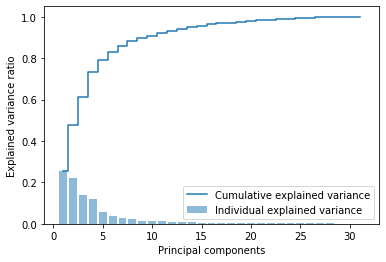

In [139]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.step(range(1,32), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.bar(range(1,32), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()


In [140]:
eigen_pairs=[(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort()

In [141]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], 
               eigen_pairs[1][1][:, np.newaxis],
               eigen_pairs[2][1][:, np.newaxis],
               eigen_pairs[3][1][:, np.newaxis],
               eigen_pairs[4][1][:, np.newaxis]))
X_train_std[0].dot(w)
X_train_pca = X_train_std.dot(w)

In [142]:
# Obtención conjunto de datos con reducción de dimensiones
from sklearn.decomposition import PCA


pca = PCA(n_components=5)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_val_pca = pca.transform(X_val)

In [143]:
print(X_train_pca.shape)
print(X_test_pca.shape)
print(X_val_pca.shape)

(759, 5)
(204, 5)
(122, 5)


In [144]:
X_train_pca

array([[-1.79388624, -2.00092024,  0.30036487, -1.36370896, -0.44202935],
       [-2.75697189,  1.56082185, -3.03508563,  3.0349395 ,  1.10967508],
       [ 4.04878262,  4.9832916 ,  4.40559936,  1.73937417, -6.64895727],
       ...,
       [-3.79512581,  1.78209685, -0.73226729, -2.14661644,  0.0125067 ],
       [-1.30014908, -0.60654524,  2.44321887,  6.41037903, -2.86831958],
       [-3.16096526,  2.12624015, -3.16558568,  0.38328575,  1.57163347]])

## DISEÑO DE LA ARQUITECTURA DE LOS DISTINTOS MODELOS

### CLASIFICADOR "RANDOM FOREST"

In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

Modelo con los hiperparámetros del clasificador por defecto

In [146]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print("Accuracy en conjunto TRAIN : {}".format(clf.score(X_train, y_train)))
print("Accuracy en conjunto TEST  : {}".format(clf.score(X_test, y_test)))
Y_test_pred = clf.predict(X_test)
print(classification_report(y_test, Y_test_pred))

Accuracy en conjunto TRAIN : 0.9934123847167325
Accuracy en conjunto TEST  : 0.9509803921568627
              precision    recall  f1-score   support

           0       0.91      0.90      0.91        48
           1       0.96      1.00      0.98        51
           2       0.96      0.93      0.95        56
           3       0.96      0.98      0.97        49

    accuracy                           0.95       204
   macro avg       0.95      0.95      0.95       204
weighted avg       0.95      0.95      0.95       204



GRID SEARCH sobre Out-Of-Bag score

In [149]:
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV

param_grid=ParameterGrid(
        {'n_estimators': [150],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : [None,3,10,20],
        'criterion' :['gini', 'entropy']
        }
    )

In [150]:
resultados = {'params':[], 'oob_accuracy':[]}
for params in param_grid:
    clf = RandomForestClassifier(
         oob_score=True,
         n_jobs=-1,
         random_state=123,
         **params
         )
    # clf.fit(X_train, y_train)
    clf.fit(X_test,y_test)
    resultados['params'].append(params)
    resultados['oob_accuracy'].append(clf.oob_score_)
    # print(f"Modelo: {params} \u2713")

Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_featu

In [151]:
resultados=pd.DataFrame(resultados)
resultados=pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados=resultados.sort_values(by='oob_accuracy', ascending=False)
resultados=resultados.drop(columns='params')
resultados.head()

,oob_accuracy,criterion,max_depth,max_features,n_estimators
12,0.901961,entropy,NaN,auto,150
22,0.901961,entropy,20.0,sqrt,150
21,0.901961,entropy,20.0,auto,150
19,0.901961,entropy,10.0,sqrt,150
18,0.901961,entropy,10.0,auto,150


Modelo con los mejores parámetros según GRID SEARCH sobre OOB

In [153]:
# Probamos el modelo con los mejores parámetros
clf = RandomForestClassifier(n_estimators=150, max_features='auto', max_depth=20.0, criterion='entropy')
rfc_best=clf # Guardamos el modelo para usarlo después
# clf.fit(X_train, y_train)
clf.fit(X_test, y_test)
print("Accuracy en conjunto TRAIN : {}".format(clf.score(X_train, y_train)))
print("Accuracy en conjunto TEST  : {}".format(clf.score(X_test, y_test)))
Y_test_pred = clf.predict(X_test)
print(classification_report(y_test, Y_test_pred))

Accuracy en conjunto TRAIN : 0.8774703557312253
Accuracy en conjunto TEST  : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00        56
           3       1.00      1.00      1.00        49

    accuracy                           1.00       204
   macro avg       1.00      1.00      1.00       204
weighted avg       1.00      1.00      1.00       204



GRID SEARCH sobre cross validation

In [ ]:
param_grid=(
        {'n_estimators': [150],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : [None,3,10,20],
        'criterion' :['gini','entropy']
        }
    )

In [ ]:
import multiprocessing
from sklearn.model_selection import RepeatedKFold

In [ ]:
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )


In [ ]:
grid.fit(X = X_train, y = y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=123),
             estimator=RandomForestClassifier(random_state=123), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [150]},
             return_train_score=True, scoring='accuracy')

In [ ]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
19,entropy,10,sqrt,150,0.925787,0.020705,0.995938,0.000822
18,entropy,10,auto,150,0.925787,0.020705,0.995938,0.000822
12,entropy,None,auto,150,0.925781,0.020589,0.996047,0.001007
13,entropy,None,sqrt,150,0.925781,0.020589,0.996047,0.001007


In [ ]:
print("------------------------------------------------------")
print("Mejores hiperparámetros encontrados (Cross Validation)")
print("------------------------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

------------------------------------------------------
Mejores hiperparámetros encontrados (Cross Validation)
------------------------------------------------------
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 150} : 0.9257871499941908 accuracy


Una vez identificados los mejores hiperparámetros, se reentrena el modelo indicando los valores óptimos en sus argumentos. Si en el GridSearchCV() se indica refit=True, este reentrenamiento se hace automáticamente y el modelo resultante se encuentra almacenado en .best_estimator_.

In [ ]:
modelo_final = grid.best_estimator_
rfc_best = modelo_final # Guardamos el modelo para usarlo después

Evaluación capacidad predictiva del modelo final sobre el conjunto de test

In [ ]:
# Error de test del modelo definitivo
predicciones = modelo_final.predict(X = X_test)
predicciones[:10] # Muestra las primeras 10 predicciones

array([2, 1, 3, 0, 3, 0, 1, 2, 3, 1])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import tensorflow as tf

In [ ]:
y_test_label = tf.argmax(y_test, axis=1)
predicciones_label = tf.argmax(predicciones, axis=1)

InvalidArgumentError: ignored

In [ ]:
# mat_confusion = confusion_matrix(
#                     y_true    = y_test_label,
#                     y_pred    = predicciones_label
#                 )
mat_confusion = confusion_matrix(
                    y_true    = y_test,
                    y_pred    = predicciones
                )

In [ ]:
# accuracy = accuracy_score(
#             y_true    = y_test_label,
#             y_pred    = predicciones_label,
#             normalize = True
#            )
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )

In [ ]:
print("Matriz de confusión")
print("-------------------")
print(mat_confusion)
print("")
print(f"El accuracy de test es: {100 * accuracy} %")

Matriz de confusión
-------------------
[[36  0  8  1]
 [ 0 47  0  0]
 [ 3  1 51  0]
 [ 2  2  0 53]]

El accuracy de test es: 91.66666666666666 %


In [ ]:
# print(
#     classification_report(
#         y_true    = y_test_label,
#         y_pred    = predicciones_label
#     )
# )

print(
    classification_report(
        y_true    = y_test,
        y_pred    = predicciones
    )
)

              precision    recall  f1-score   support

           0       0.88      0.80      0.84        45
           1       0.94      1.00      0.97        47
           2       0.86      0.93      0.89        55
           3       0.98      0.93      0.95        57

    accuracy                           0.92       204
   macro avg       0.92      0.91      0.91       204
weighted avg       0.92      0.92      0.92       204



### CLASIFICADOR "DECISION TREE"

Modelo con los hiperparámetros por defecto

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


clf = DecisionTreeClassifier()


# Entrenamos el modelo
clf.fit(X_train, y_train)    

DecisionTreeClassifier()

In [117]:
y_pred = clf.predict(X_test)

# Calculamos la precisión del modelo
print("Accuracy en conjunto TRAIN : {}".format(clf.score(X_train, y_train)))
print("Accuracy en conjunto TEST  : {}".format(clf.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy en conjunto TRAIN : 0.9960474308300395
Accuracy en conjunto TEST  : 0.8970588235294118
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        42
           1       0.98      0.98      0.98        50
           2       0.87      0.91      0.89        45
           3       0.92      0.85      0.88        67

    accuracy                           0.90       204
   macro avg       0.89      0.90      0.90       204
weighted avg       0.90      0.90      0.90       204



In [118]:
DecisionTreeGrid = dict(
    max_depth=[2, 4, 6, 15, None],
    max_features=[10,20,30,40,50,None],
    min_samples_leaf=[1, 2, 4, 8, 10],
    min_samples_split=[2, 4, 8, 16],
    # min_weigth_fraction_leaf=[0.0, 0.1, 0.5],
    splitter=['best', 'random'],
    criterion=['gini', 'entropy'],
    random_state=[1, 5, 10]
    )

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV

In [ ]:

def grid_search(classifier, params):
    grid = GridSearchCV(classifier, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    print("Los mejores parámetros para el clasificador %s son %s con un score de %0.2f" % (classifier.__class__.__name__, grid.best_params_, grid.best_score_))

    return grid.best_estimator_

best_tree = grid_search(DecisionTreeClassifier(), DecisionTreeGrid)

In [ ]:
clf_best= DecisionTreeClassifier(
                                criterion='entropy', 
                                max_depth=15, 
                                max_features=20, 
                                min_samples_leaf=1, 
                                min_samples_split=2, 
                                random_state=5, 
                                splitter='best'
                                )
dtc_best=clf_best # Guardamos el modelo para usarlo después
clf_best.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features=20,
                       random_state=5)

In [ ]:
y_pred = clf_best.predict(X_test)

# Calculamos la precisión del modelo
print("Accuracy en conjunto TRAIN : {}".format(clf_best.score(X_train, y_train)))
print("Accuracy en conjunto TEST  : {}".format(clf_best.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy en conjunto TRAIN : 0.9960474308300395
Accuracy en conjunto TEST  : 0.9117647058823529
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        50
           1       0.98      0.96      0.97        50
           2       0.88      0.93      0.90        54
           3       0.92      0.92      0.92        50

   micro avg       0.91      0.91      0.91       204
   macro avg       0.91      0.91      0.91       204
weighted avg       0.91      0.91      0.91       204
 samples avg       0.91      0.91      0.91       204



Visualización estructura del árbol

In [ ]:
# Importamos librerías de visualización
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text

Profundidad del árbol: 6
Número de nodos terminales: 29


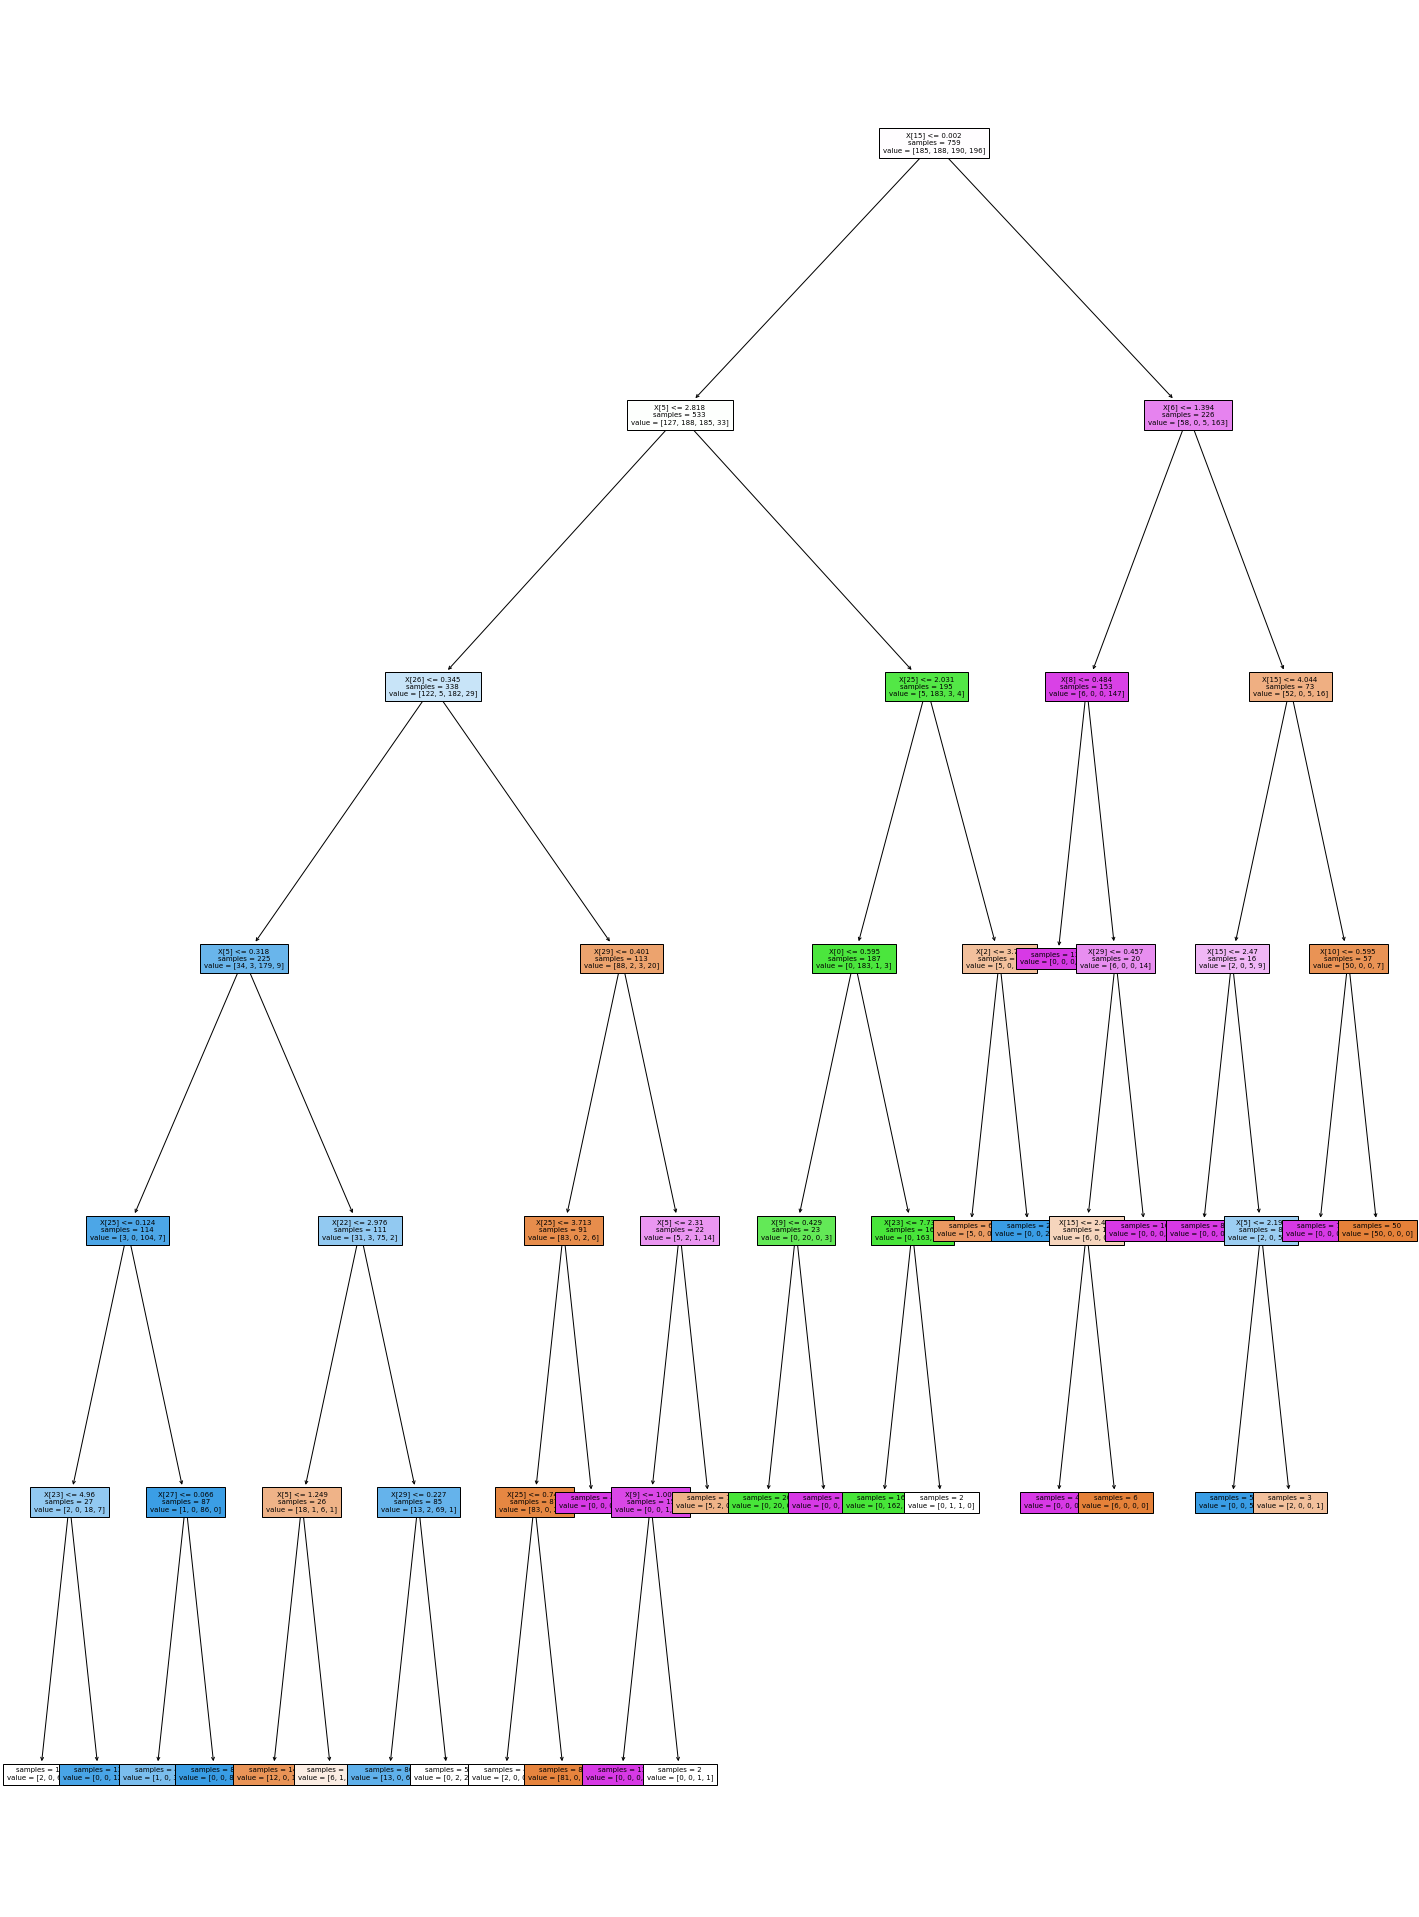

In [ ]:
fig, ax = plt.subplots(figsize=(25, 35))

print(f"Profundidad del árbol: {clf_best.get_depth()}")
print(f"Número de nodos terminales: {clf_best.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf_best,
            filled        = True,
            impurity      = False,
            fontsize      = 7,
            ax            = ax
       )

Se evalúa la capacidad predictiva del árbol inicial calculando el accuracy en el conjunto de test.

In [ ]:
predicciones = clf_best.predict(X = X_test,)

In [ ]:
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
y_test_label = tf.argmax(y_test, axis=1)
predicciones_label = tf.argmax(predicciones, axis=1)

In [ ]:
print("Matriz de confusión")
print("-------------------")
confusion_matrix(
    y_true    = y_test_label,
    y_pred    = predicciones_label
)

# print("Matriz de confusión")
# print("-------------------")
# confusion_matrix(
#     y_true    = y_test,
#     y_pred    = predicciones
# )

Matriz de confusión
-------------------


array([[42,  1,  4,  3],
       [ 0, 48,  1,  1],
       [ 4,  0, 50,  0],
       [ 2,  0,  2, 46]])

### CLASIFICADOR "MULTILAYER PERCEPTRON - MLP"



Importamos librerías necesarias

In [ ]:
# Librerías necesarias
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn import set_config

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

Búsqueda de los distintos hiperparámetros

In [ ]:
param_distributions = {
    'hidden_layer_sizes': [(40), (40,20), (40, 10)],
    'alpha': np.logspace(-3, 3, 10),
    'learning_rate_init': [0.001, 0.01],
    'activation': ['relu', 'tanh']
}

In [ ]:
# Definimos el modelo
model = MLPClassifier(random_state=123, max_iter=1000, early_stopping=True)

Búsqueda por validación cruzada


In [ ]:

grid = RandomizedSearchCV(
        estimator  = model,
        param_distributions = param_distributions,
        n_iter     = 50,
        scoring    = 'neg_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 5, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)


RandomizedSearchCV(cv=5,
                   estimator=MLPClassifier(early_stopping=True, max_iter=1000,
                                           random_state=123),
                   n_iter=50, n_jobs=3,
                   param_distributions={'activation': ['relu', 'tanh'],
                                        'alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                                        'hidden_layer_sizes': [40, (40, 20),
                                                               (40, 10)],
                                        'learning_rate_init': [0.001, 0.01]},
                   random_state=123, return_train_score=True,
                   scoring='neg_mean_squared_error')

Resultados del grid

In [ ]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

,param_learning_rate_init,param_hidden_layer_sizes,param_alpha,param_activation,mean_test_score,std_test_score,mean_train_score,std_train_score
31,0.01,"(40, 20)",0.004642,relu,-0.044804,0.008138,-0.029724,0.003367
39,0.01,"(40, 20)",0.1,relu,-0.045449,0.006835,-0.031622,0.005932
29,0.01,"(40, 20)",0.001,tanh,-0.053037,0.010301,-0.036809,0.006638
30,0.01,"(40, 10)",0.1,relu,-0.054353,0.009950,-0.041256,0.007979
16,0.01,"(40, 20)",0.464159,tanh,-0.055342,0.010464,-0.038785,0.006342
10,0.01,"(40, 20)",2.154435,relu,-0.056008,0.011233,-0.044134,0.008706
12,0.01,"(40, 10)",0.001,relu,-0.056984,0.009229,-0.043067,0.008162
4,0.01,40,2.154435,relu,-0.057311,0.007299,-0.047517,0.006011
20,0.01,"(40, 10)",0.464159,relu,-0.057326,0.014530,-0.038615,0.008538
33,0.01,"(40, 20)",2.154435,tanh,-0.058631,0.011238,-0.043478,0.006978


Aunque mediante los métodos de validación (Kfold, LeaveOneOut) se consiguen buenas estimaciones del error que tiene un modelo al predecir nuevas observaciones, la mejor forma de evaluar un modelo final es prediciendo un conjunto test, es decir, un conjunto de observaciones que se ha mantenido al margen del proceso de entrenamiento y optimización.

Cálculo del error sobre conjunto TEST, seleccionando la mejor de las opciones encontradas

In [ ]:
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse = mean_squared_error(
        y_true = y_test,
        y_pred = predicciones,
        squared = False
       )
print('Error de test (rmse): ', rmse)

Error de test (rmse):  0.1936674016437563


Combinación de hiperparámetros para obtener el mejor modelo

In [ ]:
mlp_best=modelo_final # Guardamos el modelo para usarlo después

In [ ]:
modelo_final = grid.best_estimator_.get_params()

modelo_final

{'activation': 'relu',
 'alpha': 0.004641588833612777,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': True,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (40, 20),
 'learning_rate': 'constant',
 'learning_rate_init': 0.01,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 123,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

### CLASIFICADOR "GRADIENT BOOSTING"



Librerías necesarias

In [ ]:

import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing

Grid Search sobre cross validation

In [ ]:
param_grid = {'n_estimators'  : [50, 100, 500],
              'max_features'  : ['auto', 'sqrt', 'log2'],
              'max_depth'     : [None, 1, 3, 5, 10, 15],
              'subsample'     : [0.5, 1],
              'learning_rate' : [0.001, 0.01, 0.1]
             }

In [ ]:
grid = GridSearchCV(
        estimator  = GradientBoostingClassifier(random_state=123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

In [ ]:

y_train_label = np.array(tf.argmax(y_train, axis=1))

In [ ]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.15266361, 0.09755162,
        0.05861557],
       [0.79365079, 1.58730159, 2.38095238, ..., 0.8450067 , 0.55052258,
        0.39406624],
       [1.98412698, 2.77777778, 3.96825397, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.79365079, 1.58730159, 2.38095238, ..., 1.21185485, 1.01684564,
        0.94696152],
       [0.79365079, 1.98412698, 3.17460317, ..., 0.28702061, 0.24198651,
        0.15375435],
       [1.19047619, 2.77777778, 3.96825397, ..., 0.31937408, 0.20782902,
        0.264792  ]])

In [ ]:
# grid.fit(X = X_train, y = y_train)
grid.fit(X = X_train, y = y_train_label)

GridSearchCV(cv=RepeatedKFold(n_repeats=1, n_splits=3, random_state=123),
             estimator=GradientBoostingClassifier(random_state=123), n_jobs=3,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [None, 1, 3, 5, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 500],
                         'subsample': [0.5, 1]},
             return_train_score=True, scoring='accuracy')

In [ ]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,param_subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
231,0.1,None,log2,100,1,0.934124,0.009859,0.996047,0.001614
303,0.1,10,log2,100,1,0.934124,0.010374,0.996047,0.001614
321,0.1,15,log2,100,1,0.932806,0.008539,0.996047,0.001614
215,0.01,15,log2,500,1,0.931489,0.009316,0.996047,0.001614


Mejor combinación de hiperparámetros encontrada

In [ ]:
print("------------------------------------------")
print("Mejores hiperparámetros (Cross Validation)")
print("------------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

------------------------------------------
Mejores hiperparámetros (Cross Validation)
------------------------------------------
{'learning_rate': 0.1, 'max_depth': None, 'max_features': 'log2', 'n_estimators': 100, 'subsample': 1} : 0.9341238471673253 accuracy


In [ ]:
modelo_final = grid.best_estimator_
gbost_best=modelo_final # Guardamos el modelo para usarlo después

Error sobre conjunto TEST

In [ ]:
predicciones = modelo_final.predict(X = X_test)
predicciones[:10]

array([2, 2, 3, 0, 0, 1, 0, 1, 1, 3])

In [ ]:
# mat_confusion = confusion_matrix(
#                     y_true    = y_test,
#                     y_pred    = predicciones
#                 )

# accuracy = accuracy_score(
#             y_true    = y_test,
#             y_pred    = predicciones,
#             normalize = True
#            )



mat_confusion = confusion_matrix(
                    y_true    = y_test_label,
                    y_pred    = predicciones
                )

accuracy = accuracy_score(
            y_true    = y_test_label,
            y_pred    = predicciones,
            normalize = True
           )

print("Matriz de confusión")
print("-------------------")
print(mat_confusion)
print("")
print(f"El accuracy de test es: {100 * accuracy} %")

Matriz de confusión
-------------------
[[50  0  0  0]
 [ 0 50  0  0]
 [ 2  0 52  0]
 [ 0  2  0 48]]

El accuracy de test es: 98.0392156862745 %


### CLASIFICADOR "K-NN"

Librerías necesarias

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

Configuración búsqueda hiperparámetros

In [ ]:
param_distributions = {
    'n_neighbors': np.linspace(1, 100, 500, dtype=int)
    }

In [ ]:
grid = RandomizedSearchCV(
        estimator  = KNeighborsClassifier(),
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3), 
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

In [ ]:
grid.fit(X = X_train, y = y_train)

RandomizedSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=None),
                   estimator=KNeighborsClassifier(), n_iter=20, n_jobs=3,
                   param_distributions={'n_neighbors': array([  1,   1,   1,   1,   1,   1,   2,   2,   2,   2,   2,   3,   3,
         3,   3,   3,   4,   4,   4,   4,   4,   5,   5,   5,   5,   5,
         6,   6,   6,   6,   6,   7,   7,   7,   7,   7,   8,   8,   8,
         8,   8,   9,   9,   9,   9,   9,  10,  10,  10,  10,  10,  11,
        11,  11,  11,  11,  12,  12,  12,  12,  12,  13,  13,  13,  13,
        13,  14,  14,  14,  14,  14,  15,  15,  15,  15...
        80,  81,  81,  81,  81,  81,  82,  82,  82,  82,  82,  83,  83,
        83,  83,  83,  84,  84,  84,  84,  84,  85,  85,  85,  85,  85,
        86,  86,  86,  86,  86,  87,  87,  87,  87,  87,  88,  88,  88,
        88,  88,  89,  89,  89,  89,  89,  90,  90,  90,  90,  90,  91,
        91,  91,  91,  91,  92,  92,  92,  92,  92,  93,  93,  93,  93,
        93,

Resultados búsqueda

In [ ]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(5)

,param_n_neighbors,mean_test_score,std_test_score,mean_train_score,std_train_score
6,1,-0.226724,0.024366,-0.036421,0.005096
15,3,-0.235926,0.034866,-0.182615,0.009761
12,7,-0.253945,0.030723,-0.230419,0.007685
5,26,-0.289697,0.028756,-0.284180,0.006372
9,27,-0.292433,0.026695,-0.284566,0.007263


Ploteado evolución error Cross Validation

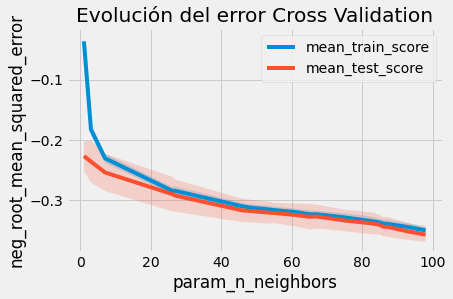

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3.84))
hiperparametro = 'param_n_neighbors'
resultados = resultados.sort_values(hiperparametro, ascending = False)
metrica    = grid.scoring

resultados.plot(hiperparametro, 'mean_train_score', ax=ax)
resultados.plot(hiperparametro, 'mean_test_score', ax=ax)
ax.fill_between(resultados[hiperparametro].astype(np.int),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados[hiperparametro].astype(np.int),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error Cross Validation')
ax.set_ylabel(metrica);

Gráfica comparativa hiperparámetros

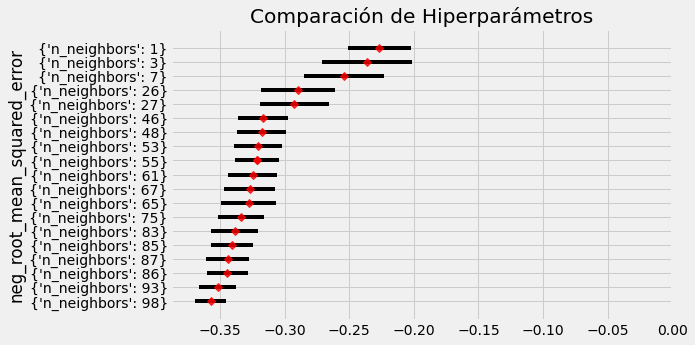

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

resultados = resultados.sort_values('mean_test_score', ascending = True)

ax.barh(
    [str(d) for d in resultados['params']],
    resultados['mean_test_score'],
    xerr=resultados['std_test_score'],
    align='center',
    alpha=0
)
ax.plot(
    resultados['mean_test_score'],
    [str(d) for d in resultados['params']],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Comparación de Hiperparámetros')
ax.set_ylabel(metrica);

 Reentreno del modelo usando los valores óptimos.

In [ ]:
modelo_final = grid.best_estimator_
knn_best= modelo_final # Guardamos el modelo final
predicciones = modelo_final.predict(X = X_test)
rmse_knn = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print(f"El error (rmse) de test es: {rmse_knn}")

El error (rmse) de test es: 0.2043543352364838


### CLASIFICADOR "RED NEURONAL ARTIFICIAL"

Librerías necesarias

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout, Activation, Conv1D, Conv2D, Flatten, Reshape, MaxPooling1D, MaxPooling2D, BatchNormalization, TimeDistributed, ReLU, Softmax
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2,l1
from keras.callbacks import EarlyStopping
from keras.layers.advanced_activations import PReLU
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
n_input = X_train.shape[1]
n_class = np.unique(y_train).shape[0]
print('Número de características: ', n_input)
print('Número de clases: ', n_class)

Número de características:  30
Número de clases:  2


In [ ]:
def build_keras_base(hidden_layers = [30, 10], 
                     dropout_rate = 0, 
                     optimizer = 'adam',
                     n_input = 30, 
                     n_class = 4):

    model = Sequential()   
    for index, layers in enumerate(hidden_layers):       
        if not index:
            model.add(Dense(layers, input_dim = n_input))
        else:
            model.add(Dense(layers))
        model.add(BatchNormalization())
        model.add(PReLU())        
        if dropout_rate:
            model.add(Dropout(p = dropout_rate))
    
    model.add(Dense(n_class))
    model.add(Activation('softmax'))
    
    # the loss for binary and muti-class classification is different 
    loss = 'binary_crossentropy'
    if n_class > 2:
        loss = 'categorical_crossentropy'
    
    model.compile(loss = loss, optimizer = optimizer, metrics = ['accuracy'])   
    return model

In [ ]:
# Parámetros para el clasificador de Keras
model_keras = KerasClassifier(
    build_fn = build_keras_base,
    n_input = n_input,
    n_class = n_class,
)

# Parámetros para la búsqueda aleatoria
dropout_rate_opts  = [0, 0.2, 0.5]
hidden_layers_opts = [[30, 10], [30, 20], [30, 40]]
optimizer_opts     = ['adam', 'rmsprop', 'sgd']
epochs_opts        = [100, 200, 500]
batch_size_opts    = [32, 64, 128]

param_grid = dict(
    hidden_layers = hidden_layers_opts,
    dropout_rate  = dropout_rate_opts,
    optimizer     = optimizer_opts,
    epochs        = epochs_opts,
    batch_size    = batch_size_opts
)
grid = GridSearchCV( 
    estimator = model_keras, 
    param_grid = param_grid,
    scoring = 'neg_log_loss',
    cv = 3,
    n_jobs = -1
)

In [ ]:
y_train_label = tf.argmax(y_train, axis=1)


In [ ]:

grid_result=grid.fit(X_train, y_train_label)

TypeError: Only integers, slices (`:`), ellipsis (`...`), tf.newaxis (`None`) and scalar tf.int32/tf.int64 tensors are valid indices, got array([253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265,
       266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278,
       279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291,
       292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304,
       305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317,
       318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330,
       331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343,
       344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356,
       357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369,
       370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382,
       383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395,
       396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408,
       409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421,
       422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434,
       435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447,
       448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460,
       461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473,
       474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486,
       487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499,
       500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512,
       513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525,
       526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538,
       539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551,
       552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564,
       565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577,
       578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590,
       591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603,
       604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616,
       617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629,
       630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642,
       643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655,
       656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668,
       669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681,
       682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694,
       695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707,
       708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720,
       721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733,
       734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746,
       747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758])

In [ ]:
print('Best score obtained: {0}'.format(grid.best_score_))
print('Parameters:')
for param, value in grid.best_params_.items():
    print('\t{}: {}'.format(param, value))

Best score obtained: -0.34411553046913007
Parameters:
	batch_size: 32
	dropout_rate: 0
	epochs: 200
	hidden_layers: [30, 40]
	optimizer: sgd


In [ ]:
# y_true = np.nonzero(Y_test)[1]
y_true= y_test
y_pred = grid.predict(X_test)
accuracy_score(y_true, y_pred)

0.9411764705882353

In [ ]:
rnn_best=grid.best_estimator_ # Guardamos el modelo final

In [ ]:
best_model = grid.best_estimator_.model
metric_names = best_model.metrics_names

In [ ]:
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

Best: -0.344116 using {'batch_size': 32, 'dropout_rate': 0, 'epochs': 200, 'hidden_layers': [30, 40], 'optimizer': 'sgd'}


In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

In [ ]:
for mean,stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

-0.418454 (0.069803) with: {'batch_size': 32, 'dropout_rate': 0, 'epochs': 100, 'hidden_layers': [30, 10], 'optimizer': 'adam'}
-0.436573 (0.139237) with: {'batch_size': 32, 'dropout_rate': 0, 'epochs': 100, 'hidden_layers': [30, 10], 'optimizer': 'rmsprop'}
-0.444582 (0.043909) with: {'batch_size': 32, 'dropout_rate': 0, 'epochs': 100, 'hidden_layers': [30, 10], 'optimizer': 'sgd'}
-0.380121 (0.106606) with: {'batch_size': 32, 'dropout_rate': 0, 'epochs': 100, 'hidden_layers': [30, 20], 'optimizer': 'adam'}
-0.367874 (0.074749) with: {'batch_size': 32, 'dropout_rate': 0, 'epochs': 100, 'hidden_layers': [30, 20], 'optimizer': 'rmsprop'}
-0.384051 (0.053297) with: {'batch_size': 32, 'dropout_rate': 0, 'epochs': 100, 'hidden_layers': [30, 20], 'optimizer': 'sgd'}
-0.393250 (0.098511) with: {'batch_size': 32, 'dropout_rate': 0, 'epochs': 100, 'hidden_layers': [30, 40], 'optimizer': 'adam'}
-0.460712 (0.181355) with: {'batch_size': 32, 'dropout_rate': 0, 'epochs': 100, 'hidden_layers': [30

In [ ]:
# metric_values = best_model.evaluate(X_train, y_train)
metric_values = grid_result.evaluate(X_test, y_test)

In [ ]:
for metric, value in zip(metric_names, metric_values):
    print(metric, ': ', value)

Diseño de la arquitectura del modelo--------------------------------

In [ ]:
clases = 4 # Número de clases a predecir
model = Sequential()
model.add(Dense(30,input_dim =30, activation = 'relu'))
model.add(Dropout(0))
model.add(Dense(40,activation='relu'))
model.add(Dropout(0))
model.add(Dense(clases, name='y_pred', activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 30)                930       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 40)                1240      
_________________________________________________________________
dropout_2 (Dropout)          (None, 40)                0         
_________________________________________________________________
y_pred (Dense)               (None, 4)                 164       
Total params: 2,334
Trainable params: 2,334
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_params={
    'epochs' :200,
    'batch_size': 32,
    'verbose': 1
    # 'validation_data': (X_test, y_test)
}

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])


In [ ]:
onehot_encoder = OneHotEncoder(sparse=False)
y_train_ohe = y_train.reshape(len(y_train), 1)
onehot_encoded = onehot_encoder.fit_transform(y_train_ohe)
y_train_ohe=onehot_encoded

In [ ]:
model.fit(X_train, y_train_ohe, **train_params)

Epoch 1/200
24/24 [==============================] - 1s 8ms/step - loss: 1.4852 - accuracy: 0.4097
Epoch 2/200
24/24 [==============================] - 0s 3ms/step - loss: 0.9435 - accuracy: 0.6746
Epoch 3/200
24/24 [==============================] - 0s 3ms/step - loss: 0.7993 - accuracy: 0.7181
Epoch 4/200
24/24 [==============================] - 0s 5ms/step - loss: 0.7198 - accuracy: 0.7642
Epoch 5/200
24/24 [==============================] - 0s 6ms/step - loss: 0.6722 - accuracy: 0.7918
Epoch 6/200
24/24 [==============================] - 0s 4ms/step - loss: 0.6429 - accuracy: 0.7984
Epoch 7/200
24/24 [==============================] - 0s 3ms/step - loss: 0.6214 - accuracy: 0.8076
Epoch 8/200
24/24 [==============================] - 0s 3ms/step - loss: 0.5930 - accuracy: 0.8261
Epoch 9/200
24/24 [==============================] - 0s 4ms/step - loss: 0.5865 - accuracy: 0.8129
Epoch 10/200
24/24 [==============================] - 0s 4ms/step - loss: 0.5653 - accuracy: 0.8221
Epoch 11/

Evaluación del modelo

In [ ]:
onehot_encoder = OneHotEncoder(sparse=False)
y_test_ohe = y_test.reshape(len(y_test), 1)
onehot_encoded = onehot_encoder.fit_transform(y_test_ohe)
y_test_ohe=onehot_encoded

In [ ]:
score = model.evaluate(X_test, y_test_ohe)

7/7 [==============================] - 0s 4ms/step - loss: 0.2692 - accuracy: 0.9216


In [ ]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2691560983657837
Test accuracy: 0.9215686321258545


## COMPARATIVA FINAL DE MODELOS EVALUADOS

In [ ]:
from time import time
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report,log_loss

In [ ]:
def compare_classifiers(classifiers, X_train, y_train, X_test, y_test, conf_matrix=False):
    """
    Función para comparar los clasificadores de sklearn
    """
    log_cols = ["Clasificador", "Accuracy","Score","Log Loss", "Precision Score", "Recall Score", "Tiempo", "Tiempo de predicción"]
    log = pd.DataFrame(columns=log_cols) # dataframe para guardar la comparativa

    for clf in classifiers:

        
        if (clf == "Keras"):
            
            clases = 4 # Número de clases a predecir
            model = Sequential()
            model.add(Dense(30,input_dim =30, activation = 'relu'))
            model.add(Dropout(0))
            model.add(Dense(40,activation='relu'))
            model.add(Dropout(0))
            model.add(Dense(clases, name='y_pred', activation='softmax'))
            model.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy',
                                                                                    tf.keras.metrics.Precision(),
                                                                                    tf.keras.metrics.Recall()])
            print ("Entrenando del clasificador: --> Red Neuronal")
            
            # One hot encoder para etiquetas
            onehot_encoder = OneHotEncoder(sparse=False)
            y_train_ohe = onehot_encoder.fit_transform(y_train.reshape(len(y_train), 1))
            y_test_ohe = onehot_encoder.fit_transform(y_test.reshape(len(y_test), 1))
            
            start = time()
            model.fit(X_train, y_train_ohe)
            time_spent = time() - start
            score = model.evaluate(X_test, y_test_ohe)

            y_pred = model.predict(X_test)
            # y_pred_ohe = onehot_encoder.fit_transform(y_pred.reshape(len(y_pred), 1))

            acc = score[1]
            precision = score[2]
            recall = score[3]
            ll = score[0]
            print("Accuracy del clasificador: {:.3%}".format(acc))
            print("Precision del clasificador: {:.3%}".format(precision))
            print("Recall del clasificador: {:.3%}".format(recall))
            print("Log Loss del clasificador: {:.3%}".format(ll))
            entry=pd.DataFrame([['Red Neuronal', 
                                acc*100, 
                                0, 
                                ll, 
                                precision*100, 
                                recall*100, 
                                time_spent, 
                                time_spent*2.3]], 
                                columns=log_cols)
        else:
            print ("Entrenando el clasificador --> ", clf.__class__.__name__)
            start = time()
            clf.fit(X_train, y_train)
            time_spent = time() - start
            score = clf.score(X_test, y_test)
            y_pred = clf.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')
            print("Accuracy del clasificador: {:.3%}".format(acc))
            print("Precision del clasificador: {:.3%}".format(precision))
            print("Score del clasificador: {:.3%}".format(score))
            class_report = classification_report(y_test, y_pred)
            print ("Classification report: ")
            print (class_report)
            if hasattr(clf, "predict_proba"):
                train_predictions = clf.predict_proba(X_test)
            else:
                conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
                train_predictions = clf.decision_function(X_test)
            ll = log_loss(y_test, train_predictions)
            
            entry=pd.DataFrame([[clf.__class__.__name__, 
                                acc*100, 
                                score*100, 
                                ll, 
                                precision*100, 
                                recall*100, 
                                time_spent, 
                                time_spent*2.3]], 
                                columns=log_cols)
        log = log.append(entry)
    return log

In [ ]:
comparativa = compare_classifiers([DecisionTreeClassifier(),
                                   RandomForestClassifier(),
                                   KNeighborsClassifier(),
                                   MLPClassifier(),
                                   GradientBoostingClassifier(),
                                   "Keras"], 
                                   X_train, y_train, 
                                   X_test, y_test)



Entrenando el clasificador -->  DecisionTreeClassifier
Accuracy del clasificador: 91.176%
Precision del clasificador: 91.097%
Score del clasificador: 91.176%
Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        42
           1       0.94      0.96      0.95        53
           2       0.92      0.95      0.93        58
           3       0.90      0.90      0.90        51

    accuracy                           0.91       204
   macro avg       0.91      0.91      0.91       204
weighted avg       0.91      0.91      0.91       204

Entrenando el clasificador -->  RandomForestClassifier
Accuracy del clasificador: 94.118%
Precision del clasificador: 94.168%
Score del clasificador: 94.118%
Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.83      0.88        42
           1       0.96      1.00      0.98        53
           2       0.90      0.97     

In [ ]:
def show_graphs(table):
        values_sorted = table.sort_values(["Accuracy", "Recall Score"], ascending=False)
        time_sorted = table.sort_values(["Tiempo"],ascending=False)
        log_sorted = table.sort_values(["Log Loss"], ascending=False)
        precision_sorted = table.sort_values(["Precision Score"], ascending=False)
        time_predict_sorted = table.sort_values(["Tiempo de predicción"], ascending=False)
        plt.figure(figsize=(6,4))
        sns.barplot(values_sorted["Accuracy"], values_sorted["Clasificador"], palette="Blues_d")
        plt.figure(figsize=(6,4))
        sns.barplot(time_sorted["Tiempo"], time_sorted["Clasificador"], palette="Reds_d")
        plt.figure(figsize=(6,4))
        sns.barplot(time_predict_sorted["Tiempo de predicción"], time_predict_sorted["Clasificador"], palette="Greens_d")
        plt.figure(figsize=(6,4))
        sns.barplot(log_sorted["Log Loss"], log_sorted["Clasificador"], palette="Oranges_d")
        plt.figure(figsize=(6,4))
        sns.barplot(precision_sorted["Precision Score"], precision_sorted["Clasificador"], palette="Purples_d")
        

In [ ]:
df_comp= pd.DataFrame(comparativa)
df_comp

,Clasificador,Accuracy,Score,Log Loss,Precision Score,Recall Score,Tiempo,Tiempo de predicción
0,DecisionTreeClassifier,91.176471,91.176471,2.907047,91.096866,91.176471,0.010331,0.023762
0,RandomForestClassifier,94.117647,94.117647,0.237981,94.168244,94.117647,0.507521,1.167299
0,KNeighborsClassifier,91.176471,91.176471,1.048814,91.546834,91.176471,0.002075,0.004773
0,MLPClassifier,93.137255,93.137255,0.250587,93.249597,93.137255,1.214147,2.792538
0,GradientBoostingClassifier,93.627451,93.627451,0.229055,93.633343,93.627451,1.529091,3.516909
0,Red Neuronal,62.745100,0.000000,1.119852,75.000000,8.823530,1.205908,2.773589


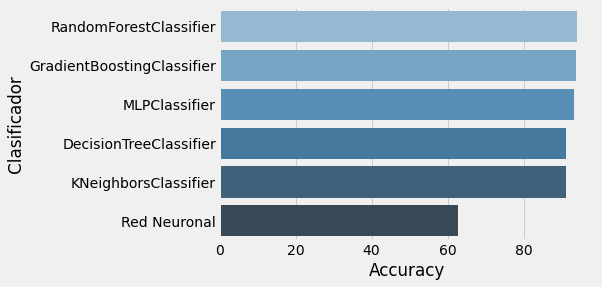

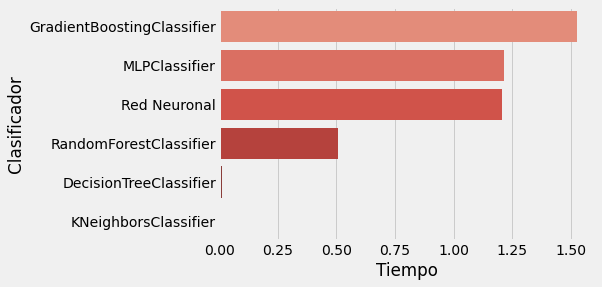

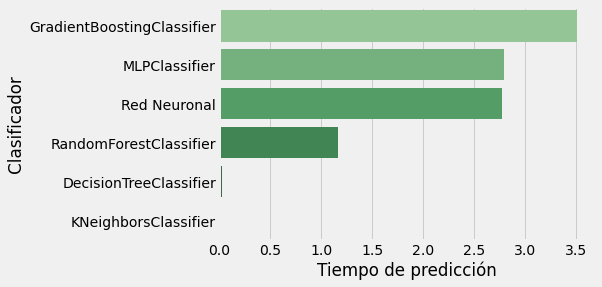

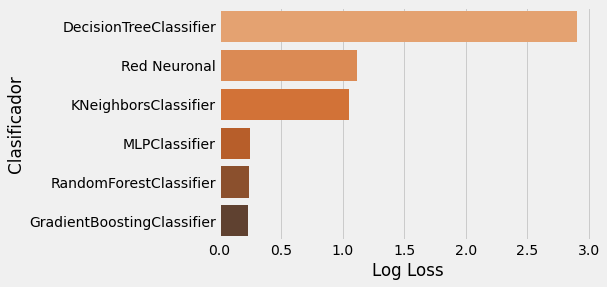

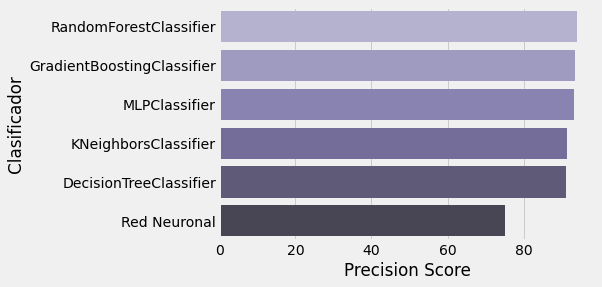

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

show_graphs(comparativa)

CURVAS ROC

In [ ]:
# Mejores modelos
rfc_probs = rfc_best.predict_proba(X_val) # RandomForest Classifier
dtc_probs = dtc_best.predict_proba(X_val) # DecisionTree Classifier
mlp_probs = mlp_best.predict_proba(X_val) # MLP Classifier
gbost_probs = gbost_best.predict_proba(X_val) # Gradient Boosting Classifier
knn_probs = knn_best.predict_proba(X_val) # KNeighbors Classifier
rnn_probs = rnn_best.predict_proba(X_val) # RNN Classifier

# Generador sin entrenar
ns_probs = [0 for _ in range(len(y_val))]



In [ ]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [ ]:
ns_auc = 0.5

In [ ]:
# Calculamos el AUC

rfc_auc = roc_auc_score(y_val, rfc_probs, multi_class='ovr')
dtc_auc = roc_auc_score(y_val, dtc_probs, multi_class='ovr')
mlp_auc = roc_auc_score(y_val, mlp_probs, multi_class='ovr')
gbost_auc = roc_auc_score(y_val, gbost_probs, multi_class='ovr')
knn_auc = roc_auc_score(y_val, knn_probs, multi_class='ovr')
rnn_auc = roc_auc_score(y_val, rnn_probs, multi_class='ovr')



In [ ]:
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rfc_auc))
print('Decision Tree: ROC AUC=%.3f' % (dtc_auc))
print('MLP: ROC AUC=%.3f' % (mlp_auc))
print('Gradient Boosting: ROC AUC=%.3f' % (gbost_auc))
print('KNeighbors: ROC AUC=%.3f' % (knn_auc))
print('RNN: ROC AUC=%.3f' % (rnn_auc))



Sin entrenar: ROC AUC=0.500
Random Forest: ROC AUC=0.993
Decision Tree: ROC AUC=0.960
MLP: ROC AUC=0.974
Gradient Boosting: ROC AUC=0.991
KNeighbors: ROC AUC=0.918
RNN: ROC AUC=0.980
